In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [23]:
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
results = []
results = session.query(Measurement.date, Measurement.prcp)
print(results.all())

[('2010-01-01', 0.08), ('2010-01-02', 0.0), ('2010-01-03', 0.0), ('2010-01-04', 0.0), ('2010-01-06', None), ('2010-01-07', 0.06), ('2010-01-08', 0.0), ('2010-01-09', 0.0), ('2010-01-10', 0.0), ('2010-01-11', 0.01), ('2010-01-12', 0.0), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0), ('2010-01-21', 0.0), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.01), ('2010-01-25', 0.0), ('2010-01-26', 0.04), ('2010-01-27', 0.12), ('2010-01-28', 0.0), ('2010-01-30', None), ('2010-01-31', 0.03), ('2010-02-01', 0.01), ('2010-02-03', None), ('2010-02-04', 0.01), ('2010-02-05', 0.0), ('2010-02-06', 0.0), ('2010-02-07', 0.0), ('2010-02-08', 0.0), ('2010-02-09', 0.0), ('2010-02-11', 0.0), ('2010-02-12', 0.02), ('2010-02-13', 0.01), ('2010-02-14', 0.0), ('2010-02-15', 0.0), ('2010-02-16', 0.0), ('2010-02-17', 0.0), ('2010-02-19', None), ('2010-02-20', 0.03), ('2010-02-21', 0.0), ('2010-02-22', 0.

In [24]:
df = pd.DataFrame(results, columns=['date','precipitation'])

In [25]:
df.set_index(df['date'], inplace=True)

In [26]:
print(df)

                  date  precipitation
date                                 
2010-01-01  2010-01-01           0.08
2010-01-02  2010-01-02           0.00
2010-01-03  2010-01-03           0.00
2010-01-04  2010-01-04           0.00
2010-01-06  2010-01-06            NaN
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[19550 rows x 2 columns]


In [27]:
print(df.to_string(index=False))

      date  precipitation
2010-01-01           0.08
2010-01-02           0.00
2010-01-03           0.00
2010-01-04           0.00
2010-01-06            NaN
2010-01-07           0.06
2010-01-08           0.00
2010-01-09           0.00
2010-01-10           0.00
2010-01-11           0.01
2010-01-12           0.00
2010-01-14           0.00
2010-01-15           0.00
2010-01-16           0.00
2010-01-17           0.00
2010-01-18           0.00
2010-01-19           0.00
2010-01-20           0.00
2010-01-21           0.00
2010-01-22           0.00
2010-01-23           0.00
2010-01-24           0.01
2010-01-25           0.00
2010-01-26           0.04
2010-01-27           0.12
2010-01-28           0.00
2010-01-30            NaN
2010-01-31           0.03
2010-02-01           0.01
2010-02-03            NaN
2010-02-04           0.01
2010-02-05           0.00
2010-02-06           0.00
2010-02-07           0.00
2010-02-08           0.00
2010-02-09           0.00
2010-02-11           0.00
2010-02-12  

In [28]:
df = df.sort_index()

In [29]:
print(df.to_string(index=False))

      date  precipitation
2010-01-01           0.08
2010-01-01           0.21
2010-01-01           0.15
2010-01-01           0.15
2010-01-01           0.05
2010-01-01           0.14
2010-01-01           0.28
2010-01-02           0.00
2010-01-02           0.00
2010-01-02           0.00
2010-01-02           0.02
2010-01-02           0.00
2010-01-02           0.00
2010-01-02           0.00
2010-01-03           0.00
2010-01-03           0.00
2010-01-03           0.00
2010-01-03           0.00
2010-01-03           0.00
2010-01-03           0.00
2010-01-03           0.00
2010-01-04           0.00
2010-01-04           0.00
2010-01-04           0.00
2010-01-04           0.00
2010-01-04           0.00
2010-01-04           0.00
2010-01-04           0.01
2010-01-05           0.00
2010-01-05           0.00
2010-01-05           0.02
2010-01-05           0.00
2010-01-05           0.00
2010-01-05           0.01
2010-01-06           0.08
2010-01-06           0.01
2010-01-06            NaN
2010-01-06  

<AxesSubplot:xlabel='date'>

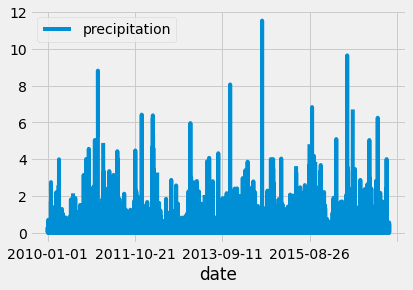

In [30]:
df.plot()

In [31]:
df.describe()

,precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [32]:
# reflect an existing database into a new model

# reflect the tables


In [ ]:
# We can view all of the classes that automap found


In [ ]:
# Save references to each table


In [ ]:
# Create our session (link) from Python to the DB


# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


In [ ]:
# How many stations are available in this dataset?


In [ ]:
# What are the most active stations?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge